In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("../all/train.csv")

x_train = dataset.iloc[:, 1:785].values/255
y_train = dataset.iloc[:, 0:1].values

In [4]:
x_train.shape, y_train.shape

((42000, 784), (42000, 1))

In [5]:
y_train

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]])

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical


In [9]:
y = to_categorical(y_train, num_classes=10)

In [10]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [14]:
classifier = Sequential()
classifier.add(Dense(units = 300, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'softmax'))
classifier.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
classifier.fit(x_train, y, batch_size = 100, epochs = 10, validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 27s 727us/step - loss: 0.4104 - acc: 0.8863 - val_loss: 0.2283 - val_acc: 0.9371
Epoch 2/10
37800/37800 [==============================] - 27s 712us/step - loss: 0.1833 - acc: 0.9464 - val_loss: 0.1569 - val_acc: 0.9550
Epoch 3/10
37800/37800 [==============================] - 27s 716us/step - loss: 0.1264 - acc: 0.9631 - val_loss: 0.1248 - val_acc: 0.9624
Epoch 4/10
37800/37800 [==============================] - 32s 839us/step - loss: 0.0923 - acc: 0.9733 - val_loss: 0.1120 - val_acc: 0.9679
Epoch 5/10
37800/37800 [==============================] - 34s 910us/step - loss: 0.0718 - acc: 0.9796 - val_loss: 0.1002 - val_acc: 0.9681
Epoch 6/10
37800/37800 [==============================] - 29s 771us/step - loss: 0.0561 - acc: 0.9842 - val_loss: 0.0955 - val_acc: 0.9714
Epoch 7/10
37800/37800 [==============================] - 32s 835us/step - loss: 0.0444 - acc: 0.9878 - val_loss: 0.0

In [16]:
test_data = pd.read_csv("../all/test.csv")

In [17]:
test_data = test_data.iloc[:, :].values / 255

In [18]:
y_pred = classifier.predict(test_data)

In [19]:
test_pred = np.argmax(y_pred, axis=1)

ValueError: num must be 1 <= num <= 12, not 0

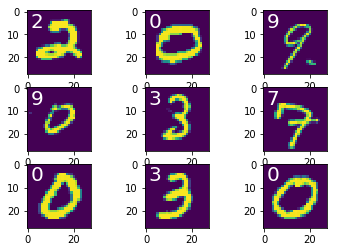

In [20]:
for i in range(10):
    plt.subplot(331+i)
    plt.text(1,7,str(test_pred[i]), fontsize=20, color = "white")
    plt.imshow(test_data[i].reshape(28,28))

In [21]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(test_pred)+1)),
                         "Label": test_pred})
submissions.to_csv("submission.csv", index=False, header=True) #saving for kaggle submission

In [22]:
classifier.save("97.37Acc.model")